# Probabilidad de que UC salga campeón en fecha 28

In [1]:
import pandas as pd
import numpy as np
import matplotlib

In [29]:
df = pd.read_csv('probs_28.csv', sep = ',', encoding = 'latin1')

In [30]:
df.tail(3)

,LOCAL,VISITA,GL,EM,GV
221,U.La Calera (Chile),Coquimbo Unido (Chile),0.36,0.33,0.30
222,U.Católica (Chile),Palestino (Chile),0.49,0.32,0.19
223,U.de Chile (Chile),U.de Concepción (Chile),0.42,0.31,0.26


In [31]:
df_equipos = pd.read_csv('tabla_equipos_actual.csv', sep = ';', encoding = 'latin-1')
equipos = list(df_equipos['EQUIPO'])
equipos

['U.Católica (Chile)',
 'Colo Colo (Chile)',
 'Palestino (Chile)',
 'Audax Italiano (Chile)',
 "O'Higgins (Chile)",
 'Huachipato (Chile)',
 'Coquimbo Unido (Chile)',
 'U.La Calera (Chile)',
 'U.Española (Chile)',
 'Cobresal (Chile)',
 'Curicó Unido (Chile)',
 'Everton (Chile)',
 'Iquique (Chile)',
 'Antofagasta (Chile)',
 'U.de Chile (Chile)',
 'U.de Concepción (Chile)']

In [32]:
def suma_puntos(row):
    indice_local = equipos.index(row['LOCAL'])
    indice_visita = equipos.index(row['VISITA'])
    if row['r_uniform'] <= row['GL']:
        puntajes[indice_local] += 3
    elif row['r_uniform'] >= 1 - row['GV']:
        puntajes[indice_visita] += 3
    else:
        puntajes[indice_local] += 1
        puntajes[indice_visita] += 1

In [33]:
n_iter = 10000
puntajes_guardados = []
posiciones_guardadas = []
for i in range(n_iter):
    puntajes = [0] * len(equipos)
    df['r_uniform'] = np.random.uniform(low=0.0, high=1.0, size=224)
    df.apply(suma_puntos, axis=1)
    puntajes_guardados.append(puntajes)
    
    s = pd.Series(puntajes)
    posiciones = list(s.rank(method='first', ascending = False))
    posiciones_guardadas.append(posiciones)

In [34]:
puntajes_guardados_df = pd.DataFrame(puntajes_guardados, columns = equipos)

In [35]:
puntajes_guardados_df.tail(3)

,U.Católica (Chile),Colo Colo (Chile),Palestino (Chile),Audax Italiano (Chile),O'Higgins (Chile),Huachipato (Chile),Coquimbo Unido (Chile),U.La Calera (Chile),U.Española (Chile),Cobresal (Chile),Curicó Unido (Chile),Everton (Chile),Iquique (Chile),Antofagasta (Chile),U.de Chile (Chile),U.de Concepción (Chile)
9997,65,40,41,40,47,40,38,38,34,44,31,35,31,34,24,27
9998,58,50,42,45,48,40,38,37,32,41,31,34,31,28,25,23
9999,57,45,36,43,43,45,39,37,45,38,35,33,32,27,24,29


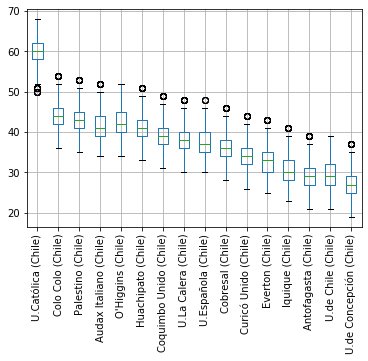

In [37]:
boxplot = puntajes_guardados_df.boxplot(rot=90)

In [38]:
puntajes_guardados_df['second_place'] = puntajes_guardados_df.apply(lambda row: row.nlargest(2).values[-1],axis=1)

In [48]:
puntajes_guardados_df.loc[puntajes_guardados_df['U.Católica (Chile)'] > puntajes_guardados_df['second_place'] + 6, 'cato_campeon'] = 1
puntajes_guardados_df.loc[puntajes_guardados_df['U.Católica (Chile)'] <= puntajes_guardados_df['second_place'] + 6, 'cato_campeon'] = 0

In [49]:
sum(puntajes_guardados_df['cato_campeon'])

9506.0